<a href="https://colab.research.google.com/github/HWANG-HOE-SUN/Univ.Project/blob/main/%EC%83%81%EA%B6%8C%EC%83%81%EC%83%9D/%EC%BD%94%EB%A1%9C%EB%82%98%EC%A0%84%ED%9B%84%EB%B6%84%EC%84%9D(3%EC%B0%A8%EC%9C%A0%ED%96%89%EC%8B%9C%EA%B8%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
a = pd.read_excel('/content/중간결과_상권군집별_업종별_시기별변화%(수정).xlsx',sheet_name='Sheet6') # 19년4분기

In [2]:
a = a.dropna(axis=0)
a

,19년4분기,상권군집번호,업종,4분기_변화%
0,0,0,SB016,-0.274193
1,1,0,SB003,-0.764790
2,2,0,SB047,0.191279
3,3,0,SB041,-0.012098
4,4,0,SB017,12.840537
...,...,...,...,...
17980,17980,300,SB002,0.465774
17996,17996,300,SB021,-0.058698
17997,17997,300,SB022,-1.000000
17998,17998,300,SB044,inf


In [3]:
b1 = pd.read_excel('/content/중간결과_상권군집별_업종별_시기별변화%(수정).xlsx',sheet_name='Sheet1')
b2 = pd.read_excel('/content/중간결과_상권군집별_업종별_시기별변화%(수정).xlsx',sheet_name='Sheet2')
b3 = pd.read_excel('/content/중간결과_상권군집별_업종별_시기별변화%(수정).xlsx',sheet_name='Sheet3')
b4 = pd.read_excel('/content/중간결과_상권군집별_업종별_시기별변화%(수정).xlsx',sheet_name='Sheet4')
b5 = pd.read_excel('/content/중간결과_상권군집별_업종별_시기별변화%(수정).xlsx',sheet_name='Sheet5')

In [4]:
print(len(b1),len(b2),len(b3),len(b4),len(b5))

3199 3229 3218 3182 3231


In [5]:
print(len(b1.dropna(axis=0)),len(b2.dropna(axis=0)),len(b3.dropna(axis=0)),len(b4.dropna(axis=0)),len(b5.dropna(axis=0)))

3199 3229 3218 3182 3231


In [6]:
b3

,20년4분기,상권군집번호,업종,4분기_변화%
0,0,0,SB016,-0.274193
1,1,0,SB003,-0.764790
2,2,0,SB047,0.191279
3,3,0,SB041,-0.012098
4,4,0,SB017,12.840537
...,...,...,...,...
3213,18237,299,SB021,-0.575467
3214,18239,299,SB001,-0.631618
3215,18244,299,SB045,inf
3216,18245,299,SB003,-0.524940


In [7]:
# 19년 4분기 (12월-10월)
집계_19년_4분기 = a.groupby('업종')['4분기_변화%'].mean().replace(np.inf,np.nan).dropna(axis=0)
집계_19년_4분기

업종
SB008     -0.156395
SB013      0.166797
SB014     -0.166662
SB023    120.304588
SB024      0.102811
SB028     -0.406880
SB035      0.072727
SB056      0.404709
SB059      2.881264
SB061     -0.176206
SB062      0.073913
Name: 4분기_변화%, dtype: float64

In [8]:
# 20년 4분기 (12월-10월)
집계_20년_4분기 = b3.groupby('업종')['4분기_변화%'].mean().replace(np.inf,np.nan).dropna(axis=0)
집계_20년_4분기

업종
SB002     -0.398477
SB003     -0.414111
SB008     -0.403736
SB009     -0.923214
SB010     -0.914498
SB011     -0.962521
SB013      0.352428
SB014     -0.129338
SB016      0.022327
SB018      0.575341
SB023    226.937448
SB024      0.113501
SB028     -0.654513
SB029     -0.662846
SB033      1.136473
SB035     -0.112310
SB056     -0.096875
SB059      2.881264
SB061     -0.130232
SB062      0.104833
Name: 4분기_변화%, dtype: float64

In [9]:
공통업종 = set(a.groupby('업종')['4분기_변화%'].mean().replace(np.inf,np.nan).dropna(axis=0).index)&set(b3.groupby('업종')['4분기_변화%'].mean().replace(np.inf,np.nan).dropna(axis=0).index)
집계_19년_4분기[list(공통업종)], 집계_20년_4분기[list(공통업종)]
# 시계/귀금속 (sb023)이 양쪽에서 모두 비정상적으로 크게 상승함 (19년 3월-19년1월), (20년3월-20년1월) 모두 10000%가 넘을정도면 이상치인데...

(업종
 SB061     -0.176206
 SB056      0.404709
 SB028     -0.406880
 SB013      0.166797
 SB008     -0.156395
 SB035      0.072727
 SB062      0.073913
 SB023    120.304588
 SB014     -0.166662
 SB059      2.881264
 SB024      0.102811
 Name: 4분기_변화%, dtype: float64, 업종
 SB061     -0.130232
 SB056     -0.096875
 SB028     -0.654513
 SB013      0.352428
 SB008     -0.403736
 SB035     -0.112310
 SB062      0.104833
 SB023    226.937448
 SB014     -0.129338
 SB059      2.881264
 SB024      0.113501
 Name: 4분기_변화%, dtype: float64)

In [10]:
집계_19년_4분기

업종
SB008     -0.156395
SB013      0.166797
SB014     -0.166662
SB023    120.304588
SB024      0.102811
SB028     -0.406880
SB035      0.072727
SB056      0.404709
SB059      2.881264
SB061     -0.176206
SB062      0.073913
Name: 4분기_변화%, dtype: float64

In [11]:
집계_20년만있는업종 = set(b3.groupby('업종')['4분기_변화%'].mean().replace(np.inf,np.nan).dropna(axis=0).index)-set(a.groupby('업종')['4분기_변화%'].mean().replace(np.inf,np.nan).dropna(axis=0).index)
집계_19년만있는업종 = set(a.groupby('업종')['4분기_변화%'].mean().replace(np.inf,np.nan).dropna(axis=0).index)-set(b3.groupby('업종')['4분기_변화%'].mean().replace(np.inf,np.nan).dropna(axis=0).index)

In [12]:
print(집계_19년만있는업종) # 없음
집계_20년만있는업종 # 다소있음 

# 20년만 있는 업종
# SB002 일식
# SB003 양식
# SB009 노래방
# SB010 기타유흥업소
# SB011 유흥주점
# SB016 편의점
# SB018 정육점
# SB029 스포츠시설
# SB033 문화용품

set()


{'SB002',
 'SB003',
 'SB009',
 'SB010',
 'SB011',
 'SB016',
 'SB018',
 'SB029',
 'SB033'}

## 코로나 이후, 충격 관련 분석(20년, 3차 대유행)

### 데이터 정제 

In [332]:
import warnings 
warnings.filterwarnings(action='ignore')

In [333]:
class 분기변화율_스케일조정:
  def __init__(self,분기,data):
    from sklearn.preprocessing import MinMaxScaler
    self.scaler = MinMaxScaler()
    self.df = data
    self.분기 = 분기
    self.temp = self.df['{}분기_변화%'.format(self.분기)] 
    if __name__ == "__main__":
      print("자동으로 해당분기 업종별 변화%의 MinMaxScaler를 적용해줍니다")
      print(__name__)
    else:
        print("임포트되어 사용됨")
        print("자동으로 해당분기 업종별 변화%의 MinMaxScaler를 적용해줍니다")
        print(__name__) 
  def rescale(self):
    self.temp = self.temp.replace(np.inf,np.nan)
    self.temp.dropna(axis=0,inplace=True)
    minmax = pd.DataFrame()
    # 업종별 변화추세에 따른 minmaxscaler 적용
    for i in self.df['업종'].unique():
      my_df = self.df[self.df['업종']==i]
      my_df['{}분기_변화%'.format(self.분기)] = self.scaler.fit_transform(my_df['{}분기_변화%'.format(self.분기)].values.reshape(-1,1))
      minmax = pd.concat([minmax,my_df])                                                                                                                                                                           
    return minmax
  def info(self):               
    print("데이터 업종 가짓수",len(self.df['업종'].unique()))
    print("데이터 상권 군집수",len(self.df['상권군집번호'].unique())) # 1분기_변화%가 무한으로 나오는걸 지워서 군집도 다소 날아감
    print("데이터 전체수",len(self.df))

In [334]:
중간결과_19년4분기변화 = a.replace(np.inf,np.nan).dropna(axis=0)
중간결과_19년4분기변화 = 분기변화율_스케일조정(4,중간결과_19년4분기변화).rescale()
중간결과_19년4분기변화.head()

자동으로 해당분기 업종별 변화%의 MinMaxScaler를 적용해줍니다
__main__


,19년4분기,상권군집번호,업종,4분기_변화%
0,0,0,SB016,0.039217
13,20,1,SB016,0.048677
26,81,2,SB016,0.051063
81,325,6,SB016,0.045905
96,386,7,SB016,0.062255


In [335]:
중간결과_20년4분기변화 = b3.replace(np.inf,np.nan).dropna(axis=0)
중간결과_20년4분기변화 = 분기변화율_스케일조정(4,중간결과_20년4분기변화).rescale()
중간결과_20년4분기변화.head()

자동으로 해당분기 업종별 변화%의 MinMaxScaler를 적용해줍니다
__main__


,20년4분기,상권군집번호,업종,4분기_변화%
0,0,0,SB016,0.039217
13,20,1,SB016,0.048677
26,81,2,SB016,0.051063
81,325,6,SB016,0.045905
96,386,7,SB016,0.062255


In [336]:
중간결과_20년4분기변화[중간결과_20년4분기변화.업종=='SB062'].iloc[:,[1,3]] # 변화율이 적었던 업종(주유소)

,상권군집번호,4분기_변화%
416,33,0.000000
1770,159,1.000000
2972,274,0.163361


In [337]:
중간결과_20년4분기변화[중간결과_20년4분기변화.업종=='SB035'].iloc[:,[1,3]] # 변화율이 적었던 업종(호텔콘도)

,상권군집번호,4분기_변화%
585,47,0.000000
1224,103,0.580792
3155,292,1.000000


In [338]:
중간결과_20년4분기변화[중간결과_20년4분기변화.업종=='SB013'].iloc[:,[1,3]] # 변화율이 보통(35%)정도였던 업종 (할인점, 슈퍼마켓)

,상권군집번호,4분기_변화%
581,47,0.182900
740,61,0.000000
788,65,1.000000
914,75,0.169587
1615,143,0.086852
2089,191,0.369245
2139,195,0.149636
2538,233,0.033597
2658,244,0.134382
2932,271,0.165193


In [339]:
중간결과_20년4분기변화[중간결과_20년4분기변화.업종=='SB023'].iloc[:,[1,3]] # 변화율이 너무 컸던 업종 (시계/귀금속) -> 하나의 이상치가 역시나 존재한게 문제였음 

,상권군집번호,4분기_변화%
73,5,0.000392
469,37,0.000032
899,74,0.000184
1187,100,0.000427
1250,106,0.000862
1571,139,0.000286
1586,140,1.000000
2090,191,0.000050
2110,193,0.003886
2267,207,0.000419


In [340]:
중간결과_20년4분기변화[중간결과_20년4분기변화.업종=='SB059'].iloc[:,[1,3]] # 변화율이 너무 컸던 업종 (자동차판매) # 상점이 하나만 있는 경우에 min_max를 적용하면 그냥 0으로 됨.

,상권군집번호,4분기_변화%
357,29,0.0


In [341]:
중간결과_20년4분기변화[중간결과_19년4분기변화.업종=='SB059'].iloc[:,[1,3]] # 변화율이 너무 컸던 업종 (자동차판매) # 상점이 하나만 있는 경우에 min_max를 적용하면 그냥 0으로 됨(19년,20년 마찬가지)

,상권군집번호,4분기_변화%
357,29,0.0


In [342]:
# 자식 클래스
class 분기변화율_재조정(분기변화율_스케일조정):
    def __init__(self, 분기, data):
        super(분기변화율_재조정, self).__init__(분기, data)  # 부모 클래스 생성자 호출
        print('분기변화율_재조정 생성자 호출') 
    def outliers_iqr(self,data):
      q1, q3 = np.percentile(data, [25,75])
      iqr = q3-q1
      lower_bound = q1 - (iqr*7.0) # 보통 정하는 1.5 기준보다 더 크게 벗어난 이상치들을 제거(너무 데이터가 적어질것을 우려)
      upper_bound = q3 + (iqr*7.0)
      return np.where((data>upper_bound)|(data<lower_bound))
    def del_outlier(self):
      temp = self.rescale().iloc[:,[1,2,3]]
      result = pd.DataFrame()
      outlier_df = pd.DataFrame()
      for i in temp.업종.unique():  
        if temp.groupby('업종').count()['4분기_변화%'].loc[i]==1:
          idx = temp[temp['업종']==i].index
          outlier_df = pd.concat([outlier_df,temp.loc[idx]],axis=0)
          temp = temp.drop(idx)
        # try: # 위의 과정으로 인해 이미 없어진 업종이 아니라면 아래작업 수행(수치적 이상치)
        #   out_idx = self.outliers_iqr(data=temp[temp['업종']==i]['4분기_변화%'])[0]
        #   outlier_df = pd.concat([outlier_df,temp[temp['업종']==i].iloc[out_idx]],axis=0)
        # except: # 이미 없어진 업종이라면 pass
        #   pass          
      
      return temp,outlier_df  

In [343]:
def outliers_iqr(data):
  q1, q3 = np.percentile(data, [25,75])
  iqr = q3-q1
  lower_bound = q1 - (iqr*7.0) # 보통 정하는 1.5 기준보다 더 크게 벗어난 이상치들을 제거(너무 데이터가 적어질것을 우려)
  upper_bound = q3 + (iqr*7.0)
  return np.where((data>upper_bound)|(data<lower_bound))

(array([2]),)


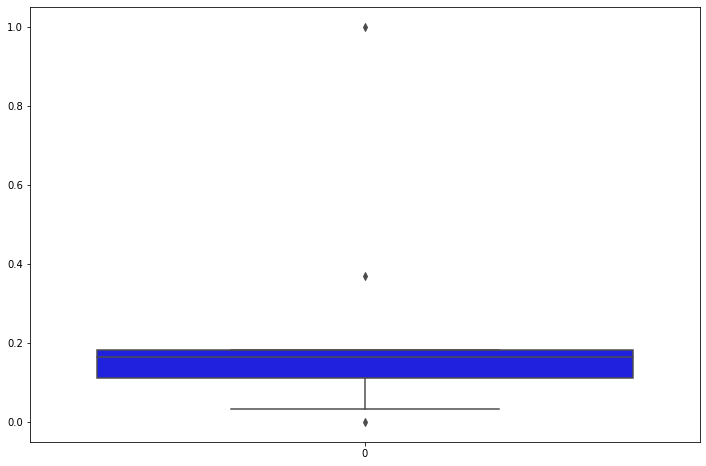

In [344]:
import matplotlib.pyplot as plt
import seaborn as sns

ang = 중간결과_20년4분기변화
print(outliers_iqr(ang[ang['업종']=='SB013']['4분기_변화%']))

plt.figure(figsize=(12,8))
sns.boxplot(data = ang[ang['업종']=='SB013']['4분기_변화%'].values,color='blue')
plt.show()

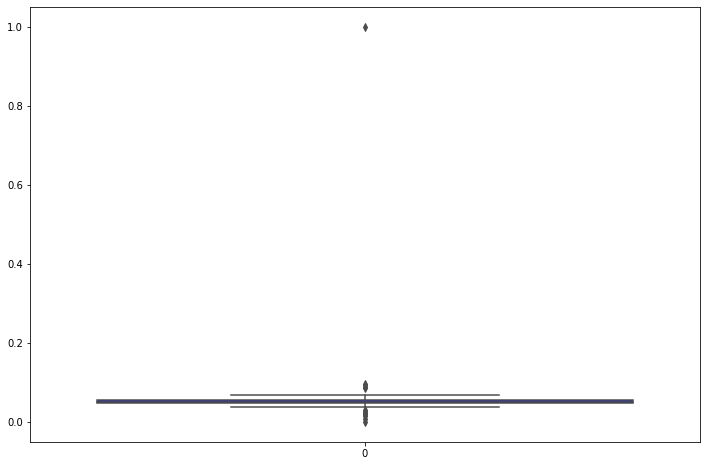

In [345]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(data = ang[ang['업종']=='SB016']['4분기_변화%'],color='blue')
plt.show()

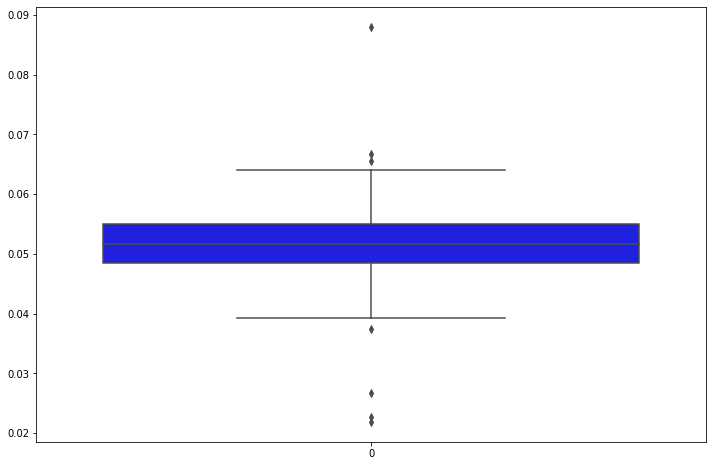

In [346]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.boxplot(data = ang[ang['업종']=='SB016'].iloc[:-157]['4분기_변화%'],color='blue')
plt.show()

In [347]:
분기변화율_20년4분기,outliers = 분기변화율_재조정(4,중간결과_20년4분기변화).del_outlier()
분기변화율_20년4분기

자동으로 해당분기 업종별 변화%의 MinMaxScaler를 적용해줍니다
__main__
분기변화율_재조정 생성자 호출


,상권군집번호,업종,4분기_변화%
0,0,SB016,0.039217
13,1,SB016,0.048677
26,2,SB016,0.051063
81,6,SB016,0.045905
96,7,SB016,0.062255
...,...,...,...
3110,288,SB029,0.074136
1597,141,SB061,0.000000
2231,204,SB061,0.127166
2947,272,SB061,1.000000


In [348]:
outliers # 아웃라이어 1(상점이 하나인 곳)+37(수치가 이상한곳) = 총 38개 거름

,상권군집번호,업종,4분기_변화%
357,29,SB059,0.0


In [349]:
분기변화율_재조정(4,중간결과_20년4분기변화).rescale()[분기변화율_재조정(4,중간결과_20년4분기변화).rescale().업종=='SB001'].sort_values(by='4분기_변화%',ascending=False)

자동으로 해당분기 업종별 변화%의 MinMaxScaler를 적용해줍니다
__main__
분기변화율_재조정 생성자 호출
자동으로 해당분기 업종별 변화%의 MinMaxScaler를 적용해줍니다
__main__
분기변화율_재조정 생성자 호출


,20년4분기,상권군집번호,업종,4분기_변화%
1518,8174,134,SB001,1.000000
487,2379,39,SB001,0.094181
1213,6222,102,SB001,0.081213
961,4880,80,SB001,0.070425
1119,5673,93,SB001,0.050592
...,...,...,...,...
1430,7686,126,SB001,0.002387
850,4270,70,SB001,0.002235
449,2135,35,SB001,0.000696
2697,15189,249,SB001,0.000000


### 정제 끝 분석 시작 

In [350]:
분기변화율_20년4분기.groupby('상권군집번호')['업종'].unique()

상권군집번호
0      [SB016, SB003, SB047, SB041, SB017, SB008, SB0...
1      [SB016, SB008, SB002, SB001, SB039, SB042, SB0...
2      [SB016, SB003, SB008, SB004, SB002, SB001, SB0...
3      [SB003, SB008, SB004, SB001, SB039, SB020, SB0...
4      [SB003, SB047, SB041, SB008, SB002, SB001, SB0...
                             ...                        
295    [SB016, SB047, SB001, SB039, SB020, SB009, SB0...
296                                       [SB055, SB061]
297                         [SB016, SB003, SB001, SB028]
298    [SB003, SB047, SB041, SB008, SB001, SB039, SB0...
299    [SB003, SB008, SB002, SB001, SB039, SB044, SB0...
Name: 업종, Length: 296, dtype: object

In [351]:
tot_list = []
for i in 분기변화율_20년4분기.groupby('상권군집번호')['업종'].unique():
  tot_list.append(list(i))
len(tot_list)

296

In [352]:
print(len(중간결과_20년4분기변화['업종'].unique()))

50


In [353]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.preprocessing import TransactionEncoder

In [550]:
tot_list # 부호 부여하기전, 단순하게 가까이 묶여있는 현재 상태로서의 장바구니 정보
te = TransactionEncoder()
te_result = te.fit(tot_list).transform(tot_list)
te_result

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True, False, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True, False,  True, ..., False, False, False],
       [ True, False,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])

In [441]:
분기변화율_20년4분기.groupby('상권군집번호')['업종'].unique().index # 군집번호임

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            290, 291, 292, 293, 294, 295, 296, 297, 298, 299],
           dtype='int64', name='상권군집번호', length=296)

In [551]:
# 상권군집번호 라는 중요한 index정보를 잃어버리지 않도록 
hallo = pd.DataFrame(te_result,columns =te.columns_)
hallo.index = 분기변화율_20년4분기.groupby('상권군집번호')['업종'].unique().index

for iter,i in enumerate(분기변화율_20년4분기.groupby('상권군집번호')['업종'].unique()):
  idx = 분기변화율_20년4분기.groupby('상권군집번호')['업종'].unique().index[iter]
  for j in i:
    temp = hallo[hallo.index==idx].T
    temp = list(temp[temp[idx]==True].index)
    globals()['군집{0}_{1}의근처업종'.format(idx,j)] = temp # 본인 업종 포함하고, 근처업종

In [552]:
def top(df, ratio, column, opt): # default옵션 ratio->0.3 , opt=False (상위 30%)
  n = int(np.floor(len(df)*ratio)) # 소수점 이하는 버림. 
  return df.sort_values(by=column, ascending=opt)[:n]

top_4분기_업종별_상위30 = 분기변화율_20년4분기.groupby('업종').apply(top,ratio=0.3, column='4분기_변화%',opt=False)
top_4분기_업종별_하위30 = 분기변화율_20년4분기.groupby('업종').apply(top,ratio=0.3, column='4분기_변화%',opt=True)

In [360]:
top_4분기_업종별_상위30.to_excel('top_4분기_업종별_상위30.xlsx')

In [361]:
top_4분기_업종별_하위30.to_excel('top_4분기_업종별_하위30.xlsx')

### 연관분석 어레인지 ( 아래의 예시에서 영감을 받아서, 새롭게 부호를 부여해서 하는 연관분석!! )

### 지정업종별로, 상위 성적을 거둔 군집 및 주변 업종 파악 

In [555]:
top_4분기_업종별_상위30.loc['SB001']  #한식

,상권군집번호,업종,4분기_변화%
1518,134,SB001,1.000000
487,39,SB001,0.094181
1213,102,SB001,0.081213
961,80,SB001,0.070425
1119,93,SB001,0.050592
...,...,...,...
1952,178,SB001,0.022932
928,76,SB001,0.022932
3054,282,SB001,0.022807
819,67,SB001,0.022744


In [556]:
top_4분기_업종별_상위30.loc['SB001'].상권군집번호.unique()  #한식

array([134,  39, 102,  80,  93, 170, 206, 260,  63,  10, 113,  45, 125,
       157, 104, 136, 142, 227, 131, 240, 109, 165,  77, 208, 254, 175,
       117, 103, 139,  17, 219, 122, 259, 180, 295, 195, 226,  90, 287,
        44,  20,  57,  12,  46, 204,  66,  43, 236, 225,  69, 164, 127,
       269, 261,  51,  32, 239, 163,  37,   7, 187, 119, 174, 120,  59,
       197,  36, 153, 123,   4, 288, 191,  78,   1,  54, 166,  64, 159,
        13, 178,  76, 282,  67, 214])

In [557]:
SB001_list = []
for 상권 in top_4분기_업종별_상위30.loc['SB001'].상권군집번호.unique():
  SB001_list.append(globals()['군집{0}_SB001의근처업종'.format(상권)])
len(SB001_list)

84

### 연관분석 예시 

In [592]:
te = TransactionEncoder()
te_001 = te.fit(SB001_list).transform(SB001_list)
te_001 = pd.DataFrame(te_001, columns=te.columns_)
te_001

,SB001,SB002,SB003,SB004,SB005,SB006,SB007,SB008,SB009,SB010,SB011,SB013,SB014,SB015,SB016,SB017,SB018,SB019,SB020,SB021,SB022,SB023,SB024,SB025,SB028,SB029,SB030,SB031,SB032,SB033,SB034,SB035,SB036,SB039,SB040,SB041,SB042,SB043,SB044,SB045,SB046,SB047,SB048,SB055,SB056,SB057,SB060,SB061,SB062
0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False
2,True,True,True,False,False,False,True,True,False,False,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False
3,True,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False,False,True,True,False,False,False,False,False,False
4,True,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,False
80,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False
81,True,True,True,False,False,True,True,True,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False
82,True,False,False,False,True,True,True,True,True,True,False,False,False,False,True,False,True,True,True,False,False,False,False,False,False,True,False,True,False,False,False,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False


In [593]:
itemset = apriori(pd.DataFrame(te_001), min_support=0.30, use_colnames=True)
itemset

,support,itemsets
0,1.000000,(SB001)
1,0.309524,(SB002)
2,0.357143,(SB005)
3,0.380952,(SB006)
4,0.702381,(SB008)
...,...,...
58,0.357143,"(SB016, SB008, SB001, SB047)"
59,0.440476,"(SB039, SB008, SB001, SB047)"
60,0.464286,"(SB016, SB039, SB001, SB047)"
61,0.333333,"(SB039, SB008, SB016, SB047)"


In [594]:
association_rules(itemset, metric="lift", min_threshold=1) # 향상도가 최소 1이상인 연관관계 출력

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(SB002),(SB001),0.309524,1.000000,0.309524,1.000000,1.000000,0.000000,inf
1,(SB001),(SB002),1.000000,0.309524,0.309524,0.309524,1.000000,0.000000,1.000000
2,(SB005),(SB001),0.357143,1.000000,0.357143,1.000000,1.000000,0.000000,inf
3,(SB001),(SB005),1.000000,0.357143,0.357143,0.357143,1.000000,0.000000,1.000000
4,(SB006),(SB001),0.380952,1.000000,0.380952,1.000000,1.000000,0.000000,inf
...,...,...,...,...,...,...,...,...,...
195,"(SB001, SB047)","(SB016, SB008, SB039)",0.678571,0.476190,0.333333,0.491228,1.031579,0.010204,1.029557
196,(SB008),"(SB016, SB039, SB001, SB047)",0.702381,0.464286,0.333333,0.474576,1.022164,0.007228,1.019585
197,(SB039),"(SB016, SB008, SB001, SB047)",0.833333,0.357143,0.333333,0.400000,1.120000,0.035714,1.071429
198,(SB001),"(SB016, SB008, SB039, SB047)",1.000000,0.333333,0.333333,0.333333,1.000000,0.000000,1.000000


In [595]:
result_df = association_rules(itemset, metric="lift", min_threshold=1).loc[:,['antecedents','consequents','leverage']]
result_df.sort_values(by='leverage',ascending=False)

,antecedents,consequents,leverage
106,"(SB039, SB001)",(SB047),0.053571
111,(SB047),"(SB039, SB001)",0.053571
43,(SB047),(SB039),0.053571
109,(SB039),"(SB001, SB047)",0.053571
108,"(SB001, SB047)",(SB039),0.053571
...,...,...,...
69,(SB001),"(SB016, SB008)",0.000000
64,"(SB016, SB008)",(SB001),0.000000
63,(SB001),"(SB039, SB006)",0.000000
62,"(SB039, SB006)",(SB001),0.000000


### 다른 시기, 다른 업종에 대해서도 시도 